In [3]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [4]:
#读取数据
train_data = datasets.MNIST(root="./data", train=True, 
                            download=True,transform=transforms.ToTensor())
test_data = datasets.MNIST(root="./data", train=False, 
                           download=True, transform=transforms.ToTensor())


In [5]:
train_data,test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [6]:
#创建数据加载器
batch_size = 16
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers = 0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers = 0)


In [7]:
# 查看数据
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_targets)
print(example_data.shape)

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7])
torch.Size([16, 1, 28, 28])


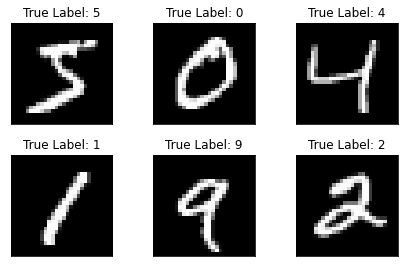

In [13]:
# 图像可视化
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("True Label: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [32]:
import torch.nn as nn
import torch.nn.functional as F
class MLP4(nn.Module):
    def __init__(self,input_dim, hidden_dim, num_class):
        super(MLP4, self).__init__()

        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, 200)
        self.linear3 = nn.Linear(200, 100)
        self.linear4 = nn.Linear(100, num_class)
        

    def forward(self, data):
        #先将图片数据转化为1*784的张量
        data = data.view(-1, 28*28)
        data = F.relu(self.linear1(data))
        data = F.relu((self.linear2(data)))
        data = F.relu((self.linear3(data)))
        data = F.log_softmax(data, dim = 1)

        return data

In [33]:
input_size = 28*28
hidden_size = 500
class_num = 10
epochs = 10

model = MLP4(input_size, hidden_size, class_num)

print(model)

MLP4(
  (linear1): Linear(in_features=784, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=200, bias=True)
  (linear3): Linear(in_features=200, out_features=100, bias=True)
  (linear4): Linear(in_features=100, out_features=10, bias=True)
)


In [34]:
import torch.optim as optim
loss_function = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.01) 

In [35]:
total_step = len(train_loader)

for epoch in range(epochs):
    train_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output,target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    train_loss = train_loss / len(train_loader.dataset)
    print('Epoch:  {}  \tTraining Loss: {:.6f}'.format(epoch + 1, train_loss))

Epoch:  1  	Training Loss: 1.470005
Epoch:  2  	Training Loss: 1.088731
Epoch:  3  	Training Loss: 1.065158
Epoch:  4  	Training Loss: 1.050406
Epoch:  5  	Training Loss: 1.042570
Epoch:  6  	Training Loss: 0.664654
Epoch:  7  	Training Loss: 0.635700
Epoch:  8  	Training Loss: 0.619671
Epoch:  9  	Training Loss: 0.627280
Epoch:  10  	Training Loss: 0.616992


In [36]:
correct = 0
total = 0
with torch.no_grad():  # 训练集中不需要反向传播
    for data in test_loader:
        images, labels = data
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 84 %
